# Image Classification
The idea of this project is to train a Neural Network to classify images.

In [18]:
from data_manipulation.data_loader import DataLoader, imshow
from model.base_model import NeuralNetwork
from model.trainer import Trainer
import torch
import matplotlib.pyplot as plt

In [ ]:
data = DataLoader()
#data.show_subplot(4,4)

In [3]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

trainer = Trainer(model, criterion, optimizer)

In [21]:
trainer.train(data.trainloader)

loss: 1.433100  [    0/50000]
loss: 1.211053  [ 4000/50000]
loss: 1.130578  [ 8000/50000]
loss: 0.565954  [12000/50000]
loss: 0.593566  [16000/50000]
loss: 1.232721  [20000/50000]
loss: 1.131648  [24000/50000]
loss: 0.937535  [28000/50000]
loss: 2.278900  [32000/50000]
loss: 1.894217  [36000/50000]
loss: 0.845830  [40000/50000]
loss: 1.776660  [44000/50000]
loss: 0.388602  [48000/50000]


In [22]:
trainer.test(data.testloader)

Test Error: 
 Accuracy: 58.0%, Avg loss: 1.191681 



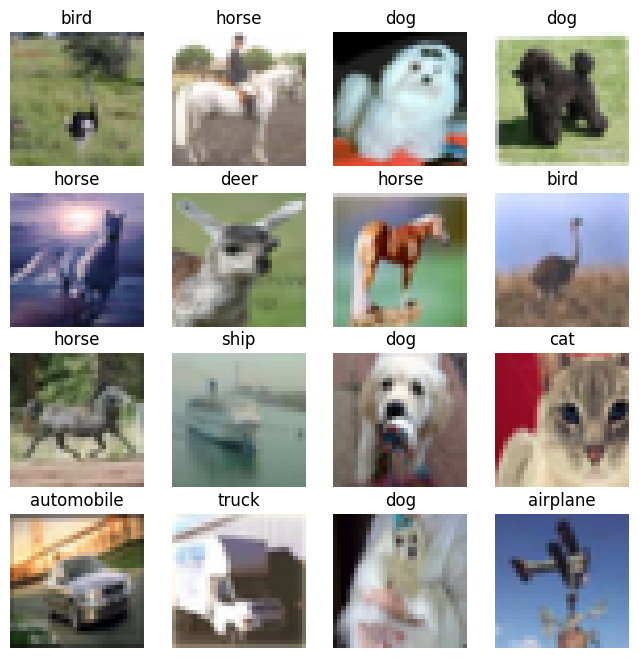

In [49]:
imageIndex = 310



cols, rows = 4, 4
figure = plt.figure(figsize=(8, 8))
images_index = []
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data.testset), size=(1,)).item()
    img, label = data.testset[sample_idx]
    images_index.append(sample_idx)
    ax = figure.add_subplot(rows, cols, i)
    ax.set_title(data.classes[label])
    plt.axis("off")
    imshow(img)


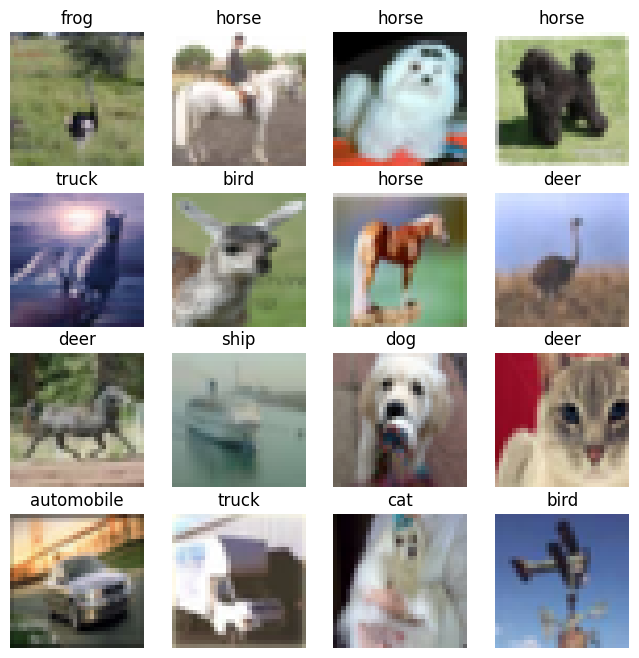

In [50]:
figure = plt.figure(figsize=(8, 8))
for i in range(1, cols * rows + 1):
    index = images_index[i-1]
    img, label = data.testset[index]
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)
    ax = figure.add_subplot(rows, cols, i)
    ax.set_title(data.classes[predicted])
    plt.axis("off")
    imshow(img)


In [32]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainer.train(data.trainloader)
    trainer.test(data.testloader)
print("Done!")